<a href="https://colab.research.google.com/github/Manasvigiradkar/Crime/blob/main/Crime_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [224]:
import numpy as np
import timeit
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [225]:

df=pd.read_csv("/content/Crime proper data.csv")
df['Total'] = 1
df.head()

,Sr. No.,Crime Type,Pending Cases(Prev. Year),Reported Cases (This Year),Total Cases for Investigation,Not Investigated Cases,Total FR Cases,Total Charge Sheeted Cases,Total Disposed by Police,Pending Cases(End of Year),Charge Sheet Rate %,Total
0,1,Murder with Rape/Gang Rape,108,223,331,0,11,211,222,109.0,95.0,1
1,2,Dowry Deaths,3758,7466,11230,0,714,7038,7758,3468.0,90.7,1
2,3,Abetment to Suicide of Women,2269,5282,7557,0,427,4383,4816,2735.0,91.0,1
3,4,Miscarriage,129,266,395,0,134,124,258,137.0,48.1,1
4,5,Acid Attack,55,148,203,0,16,130,146,57.0,89.0,1


In [226]:
df.dtypes
df.dropna()

,Sr. No.,Crime Type,Pending Cases(Prev. Year),Reported Cases (This Year),Total Cases for Investigation,Not Investigated Cases,Total FR Cases,Total Charge Sheeted Cases,Total Disposed by Police,Pending Cases(End of Year),Charge Sheet Rate %,Total
0,1,Murder with Rape/Gang Rape,108,223,331,0,11,211,222,109.0,95.0,1
1,2,Dowry Deaths,3758,7466,11230,0,714,7038,7758,3468.0,90.7,1
2,3,Abetment to Suicide of Women,2269,5282,7557,0,427,4383,4816,2735.0,91.0,1
3,4,Miscarriage,129,266,395,0,134,124,258,137.0,48.1,1
4,5,Acid Attack,55,148,203,0,16,130,146,57.0,89.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
531,532,POCSO Act Section 12,191,176,367,0,6,143,149,218.0,96.0,1
532,533,POCSO Act Section 14 and 15,42,51,93,0,6,33,39,54.0,84.6,1
533,534,"POCSO Act Section 17,18,19",24,48,72,0,17,34,51,21.0,66.7,1
534,535,POCSO Act r/w Section 377 IPC,5,11,16,0,0,10,10,6.0,100.0,1


In [227]:
print('Original Data Size after dropping Duplicates')
print('Before dropping duplicates:', df.shape)

# List columns to verify the column name
print('Available columns:', df.columns)

# Drop duplicates
try:
    df = df.drop_duplicates(subset='Total FR Cases', keep='first')
except KeyError as e:
    print(f"Error: {e}. Please check the column name.")
    # Optionally, drop duplicates based on all columns if the column is not found
    df = df.drop_duplicates(keep='first')

print('After dropping duplicates:', df.shape)




Original Data Size after dropping Duplicates
Before dropping duplicates: (536, 12)
Available columns: Index(['Sr. No.', 'Crime Type', 'Pending Cases(Prev. Year)',
       'Reported Cases (This Year)', 'Total Cases for Investigation',
       'Not Investigated Cases', 'Total FR Cases',
       'Total Charge Sheeted Cases', 'Total Disposed by Police',
       'Pending Cases(End of Year)', 'Charge Sheet Rate %', 'Total'],
      dtype='object')
After dropping duplicates: (309, 12)


In [228]:
df.head()

,Sr. No.,Crime Type,Pending Cases(Prev. Year),Reported Cases (This Year),Total Cases for Investigation,Not Investigated Cases,Total FR Cases,Total Charge Sheeted Cases,Total Disposed by Police,Pending Cases(End of Year),Charge Sheet Rate %,Total
0,1,Murder with Rape/Gang Rape,108,223,331,0,11,211,222,109.0,95.0,1
1,2,Dowry Deaths,3758,7466,11230,0,714,7038,7758,3468.0,90.7,1
2,3,Abetment to Suicide of Women,2269,5282,7557,0,427,4383,4816,2735.0,91.0,1
3,4,Miscarriage,129,266,395,0,134,124,258,137.0,48.1,1
4,5,Acid Attack,55,148,203,0,16,130,146,57.0,89.0,1


In [229]:
drop_colmns = ['Pending Cases(Prev. Year)','Reported Cases (This Year)','Total Cases for Investigation','Not Investigated Cases','Total FR Cases' ]

df_dropped = df.drop(columns=drop_colmns)


In [230]:

df_dropped.dtypes

,0
Sr. No.,int64
Crime Type,object
Total Charge Sheeted Cases,int64
Total Disposed by Police,int64
Pending Cases(End of Year),float64
Charge Sheet Rate %,float64
Total,int64


In [231]:
# Step 1: Filter data for a specific crime type
crime_type = df[df['Crime Type'] == 'Murder']
crime_type = df[df['Crime Type'] == 'Rape']

# Step 2: Group by 'Crime Type' and sum up relevant columns
crime_stats = crime_type.groupby('Crime Type', as_index=False).agg({
    'Total Charge Sheeted Cases': 'sum',
    'Total Disposed by Police': 'sum',
    'Pending Cases(End of Year)': 'sum',
    'Charge Sheet Rate %': 'mean',  # Assuming you want the average charge sheet rate
    'Total': 'sum'
})

sorted_stats = crime_stats.sort_values(by='Total', ascending=False)


In [232]:
sorted_stats

,Crime Type,Total Charge Sheeted Cases,Total Disposed by Police,Pending Cases(End of Year),Charge Sheet Rate %,Total
0,Rape,103188,127873,53641.4,80.5,5


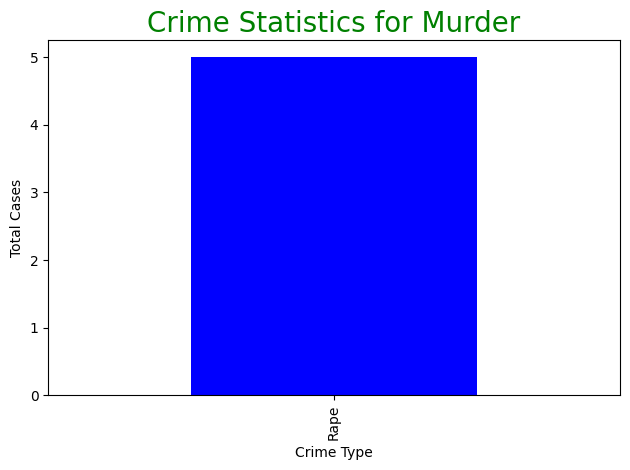

In [233]:
sorted_stats = crime_stats.sort_values(by='Total', ascending=False)
ax = sorted_stats.plot.bar(x='Crime Type', y='Total', legend=False, color='blue')
ax.set_xlabel('Crime Type')
ax.set_ylabel('Total Cases')
ax.set_title('Crime Statistics for Murder', color='green', fontsize=20)
plt.tight_layout()
plt.show()

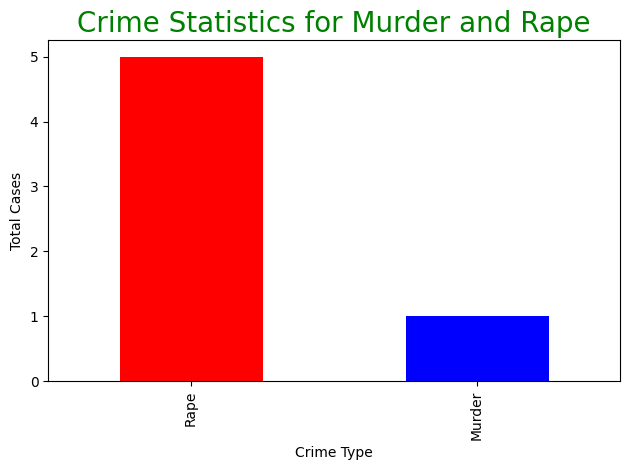

In [234]:

crime_types = df[df['Crime Type'].isin(['Murder', 'Rape'])]
crime_stats = crime_types.groupby('Crime Type', as_index=False).agg({
    'Total Charge Sheeted Cases': 'sum',
    'Total Disposed by Police': 'sum',
    'Pending Cases(End of Year)': 'sum',
    'Charge Sheet Rate %': 'mean',
    'Total': 'sum'
})
sorted_stats = crime_stats.sort_values(by='Total', ascending=False)
ax = sorted_stats.plot.bar(x='Crime Type', y='Total', legend=False, color=['red', 'blue'])
ax.set_xlabel('Crime Type')
ax.set_ylabel('Total Cases')
ax.set_title('Crime Statistics for Murder and Rape', color='green', fontsize=20)

plt.tight_layout()
plt.show()


In [235]:
!pip install matplotlib scikit-learn


In [236]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [237]:
features = df[['Pending Cases(Prev. Year)','Reported Cases (This Year)','Total Cases for Investigation','Not Investigated Cases','Total FR Cases','Total Charge Sheeted Cases','Total Disposed by Police','Pending Cases(End of Year)','Charge Sheet Rate %']]


In [238]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

# Step 1: Inspect the data
print("Type of X:", type(X))
if isinstance(X, pd.DataFrame):
    print("Data types:\n", X.dtypes)
    print("First few rows:\n", X.head())

# Step 2: Convert to numeric
X = pd.DataFrame(X).apply(pd.to_numeric, errors='coerce')

# Step 3: Check for NaNs
print("NaN count per column:\n", X.isna().sum())
print("Total NaNs in data:", np.isnan(X).sum())

# Step 4: Handle NaNs (e.g., replace with mean)
imputer = SimpleImputer(strategy='mean')
X_cleaned = imputer.fit_transform(X)

print("Cleaned data:\n", X_cleaned)


Type of X: <class 'pandas.core.frame.DataFrame'>
Data types:
 Pending Cases(Prev. Year)        float64
Reported Cases (This Year)       float64
Total Cases for Investigation    float64
Not Investigated Cases           float64
Total FR Cases                   float64
dtype: object
First few rows:
    Pending Cases(Prev. Year)  Reported Cases (This Year)  \
0                      108.0                       223.0   
1                     3758.0                      7466.0   
2                     2269.0                      5282.0   
3                      129.0                       266.0   
4                       55.0                       148.0   

   Total Cases for Investigation  Not Investigated Cases  Total FR Cases  
0                          331.0                     0.0            11.0  
1                        11230.0                     0.0           714.0  
2                         7557.0                     0.0           427.0  
3                          395.0         

In [239]:
from sklearn.impute import SimpleImputer

# Replace NaNs with the mean of each feature
imputer = SimpleImputer(strategy='mean')  # You can also try 'median' or 'most_frequent'
X = imputer.fit_transform(X)


In [240]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)


In [241]:
from sklearn.cluster import KMeans

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


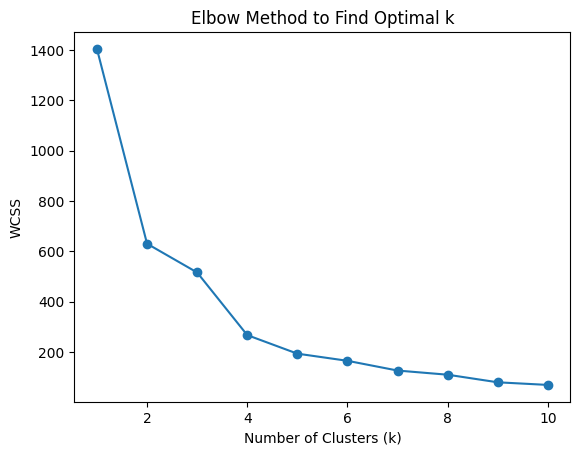

In [242]:
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method to Find Optimal k')
plt.show()

# **Fit K-Means With optimal K**

In [243]:
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans

# Step 1: Preprocess columns directly in df
selected_columns = ['Pending Cases(Prev. Year)','Reported Cases (This Year)','Total Cases for Investigation','Not Investigated Cases','Total FR Cases']  # Replace with your actual column names
imputer = SimpleImputer(strategy='mean')
df[selected_columns] = imputer.fit_transform(df[selected_columns])

# Step 2: Prepare X
X = df[selected_columns]

# Step 3: Apply KMeans and assign clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Step 4: Verify the results
print(df.head())



   Sr. No.                    Crime Type  Pending Cases(Prev. Year)  \
0        1    Murder with Rape/Gang Rape                      108.0   
1        2                  Dowry Deaths                     3758.0   
2        3  Abetment to Suicide of Women                     2269.0   
3        4                   Miscarriage                      129.0   
4        5                   Acid Attack                       55.0   

   Reported Cases (This Year)  Total Cases for Investigation  \
0                       223.0                          331.0   
1                      7466.0                        11230.0   
2                      5282.0                         7557.0   
3                       266.0                          395.0   
4                       148.0                          203.0   

   Not Investigated Cases  Total FR Cases  Total Charge Sheeted Cases  \
0                     0.0            11.0                         211   
1                     0.0           714.0 

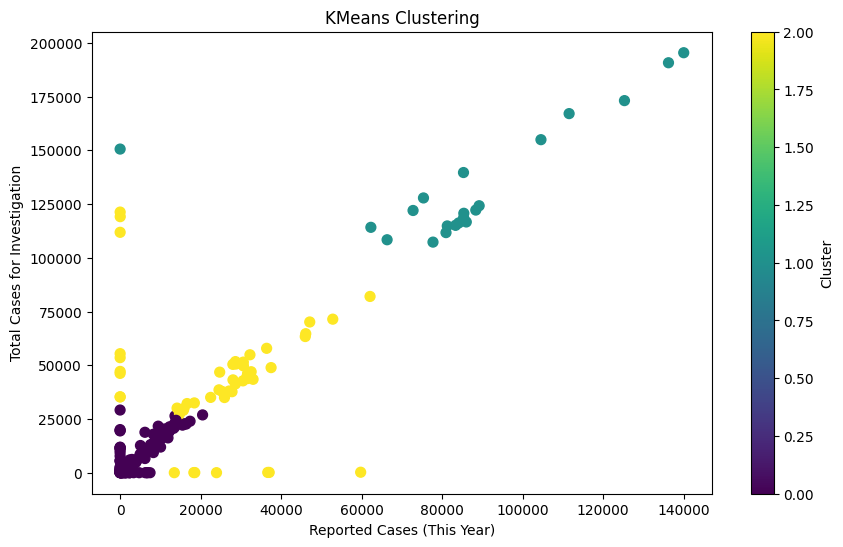

In [244]:
import matplotlib.pyplot as plt

# Step 5: Select two columns to plot (e.g., 'Reported Cases (This Year)' and 'Total Cases for Investigation')
x_axis = df['Reported Cases (This Year)']
y_axis = df['Total Cases for Investigation']

# Step 6: Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x_axis, y_axis, c=df['Cluster'], cmap='viridis', s=50)  # Color points by cluster
plt.xlabel('Reported Cases (This Year)')
plt.ylabel('Total Cases for Investigation')
plt.title('KMeans Clustering')
plt.colorbar(label='Cluster')
plt.show()


In [245]:
print("Original Columns:", df.columns.tolist())
df.columns = df.columns.str.strip().str.replace('\xa0', '', regex=True)
print("Cleaned Columns:", df.columns.tolist())
print(df[['Total FR Cases', 'Charge Sheet Rate %']].head())



Original Columns: ['Sr. No.', 'Crime Type', 'Pending Cases(Prev. Year)', 'Reported Cases (This Year)', 'Total Cases for Investigation', 'Not Investigated Cases', 'Total FR Cases', 'Total Charge Sheeted Cases', 'Total Disposed by Police', 'Pending Cases(End of Year)', 'Charge Sheet Rate %', 'Total', 'Cluster']
Cleaned Columns: ['Sr. No.', 'Crime Type', 'Pending Cases(Prev. Year)', 'Reported Cases (This Year)', 'Total Cases for Investigation', 'Not Investigated Cases', 'Total FR Cases', 'Total Charge Sheeted Cases', 'Total Disposed by Police', 'Pending Cases(End of Year)', 'Charge Sheet Rate %', 'Total', 'Cluster']
   Total FR Cases  Charge Sheet Rate %
0            11.0                 95.0
1           714.0                 90.7
2           427.0                 91.0
3           134.0                 48.1
4            16.0                 89.0


In [246]:
df

,Sr. No.,Crime Type,Pending Cases(Prev. Year),Reported Cases (This Year),Total Cases for Investigation,Not Investigated Cases,Total FR Cases,Total Charge Sheeted Cases,Total Disposed by Police,Pending Cases(End of Year),Charge Sheet Rate %,Total,Cluster
0,1,Murder with Rape/Gang Rape,108.0,223.0,331.0,0.0,11.0,211,222,109.0,95.0,1,0
1,2,Dowry Deaths,3758.0,7466.0,11230.0,0.0,714.0,7038,7758,3468.0,90.7,1,0
2,3,Abetment to Suicide of Women,2269.0,5282.0,7557.0,0.0,427.0,4383,4816,2735.0,91.0,1,0
3,4,Miscarriage,129.0,266.0,395.0,0.0,134.0,124,258,137.0,48.1,1,0
4,5,Acid Attack,55.0,148.0,203.0,0.0,16.0,130,146,57.0,89.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
519,520,"Procuring, inducing Children for the sake of p...",407.0,57.0,464.0,0.0,48.0,47,95,369.0,49.5,1,0
525,526,Cyber Crimes/Information Technology Act,470.0,340.0,810.0,0.0,79.0,104,183,625.0,56.8,1,0
528,529,Protection of Children from Sexual Offences Act,3900.0,6421.0,10456.0,0.0,265.0,5796,6084,4365.0,95.3,1,0
529,530,POCSO Act Section 4 and 6,1864.0,3942.0,5874.0,0.0,108.0,3619,3747,2120.0,96.6,1,0


In [247]:
df.to_csv('crime_data.csv', index=False)


# **Sales Prediction Model**

In [248]:
!pip install joblib
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [249]:
# Load dataset
df = pd.read_csv("crime_data.csv")
df


,Sr. No.,Crime Type,Pending Cases(Prev. Year),Reported Cases (This Year),Total Cases for Investigation,Not Investigated Cases,Total FR Cases,Total Charge Sheeted Cases,Total Disposed by Police,Pending Cases(End of Year),Charge Sheet Rate %,Total,Cluster
0,1,Murder with Rape/Gang Rape,108.0,223.0,331.0,0.0,11.0,211,222,109.0,95.0,1,0
1,2,Dowry Deaths,3758.0,7466.0,11230.0,0.0,714.0,7038,7758,3468.0,90.7,1,0
2,3,Abetment to Suicide of Women,2269.0,5282.0,7557.0,0.0,427.0,4383,4816,2735.0,91.0,1,0
3,4,Miscarriage,129.0,266.0,395.0,0.0,134.0,124,258,137.0,48.1,1,0
4,5,Acid Attack,55.0,148.0,203.0,0.0,16.0,130,146,57.0,89.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,520,"Procuring, inducing Children for the sake of p...",407.0,57.0,464.0,0.0,48.0,47,95,369.0,49.5,1,0
305,526,Cyber Crimes/Information Technology Act,470.0,340.0,810.0,0.0,79.0,104,183,625.0,56.8,1,0
306,529,Protection of Children from Sexual Offences Act,3900.0,6421.0,10456.0,0.0,265.0,5796,6084,4365.0,95.3,1,0
307,530,POCSO Act Section 4 and 6,1864.0,3942.0,5874.0,0.0,108.0,3619,3747,2120.0,96.6,1,0


# **Data Preprocessing**

In [250]:
print(df.isnull().sum())

Sr. No.                           0
Crime Type                        0
Pending Cases(Prev. Year)         0
Reported Cases (This Year)        0
Total Cases for Investigation     0
Not Investigated Cases            0
Total FR Cases                    0
Total Charge Sheeted Cases        0
Total Disposed by Police          0
Pending Cases(End of Year)        0
Charge Sheet Rate %              28
Total                             0
Cluster                           0
dtype: int64


In [251]:
df =df.dropna()

In [252]:
try:
    X = df.drop('Total FR Cases', axis=1)
    y = df['Total FR Cases']
except KeyError:
    print("Error: 'Total FR Cases' column not found. Please check your data.")
    exit()

In [253]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Step 1: Ensure X is a DataFrame
selected_columns = ['Pending Cases(Prev. Year)', 'Reported Cases (This Year)',
                    'Total Cases for Investigation', 'Not Investigated Cases',
                    'Total FR Cases']  # Replace with actual column names
X = df[selected_columns]

# Step 2: Handle non-numeric data
X = X.apply(pd.to_numeric, errors='coerce')  # Convert to numeric, replace non-numeric with NaN
X = X.fillna(X.mean())  # Impute missing values with the mean

# Step 3: Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Verify the scaled data
print(pd.DataFrame(X_scaled, columns=selected_columns).head())


   Pending Cases(Prev. Year)  Reported Cases (This Year)  \
0                  -0.612450                   -0.501317   
1                  -0.309029                   -0.208331   
2                  -0.432808                   -0.296676   
3                  -0.610705                   -0.499577   
4                  -0.616856                   -0.504351   

   Total Cases for Investigation  Not Investigated Cases  Total FR Cases  
0                      -0.587089                -0.17398       -0.473658  
1                      -0.298449                -0.17398       -0.398858  
2                      -0.395722                -0.17398       -0.429395  
3                      -0.585394                -0.17398       -0.460571  
4                      -0.590479                -0.17398       -0.473126  


In [254]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [255]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [256]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import joblib
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [257]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [258]:
# Measure how well the model predicts sales using standard metrics.
y_pred = model.predict(X_test)

In [259]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [260]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [261]:
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R² Score: {r2}")

Mean Absolute Error: 177.37631578947367
Mean Squared Error: 731208.0118789471
Root Mean Squared Error: 855.1070177930638
R² Score: 0.9904093030872541


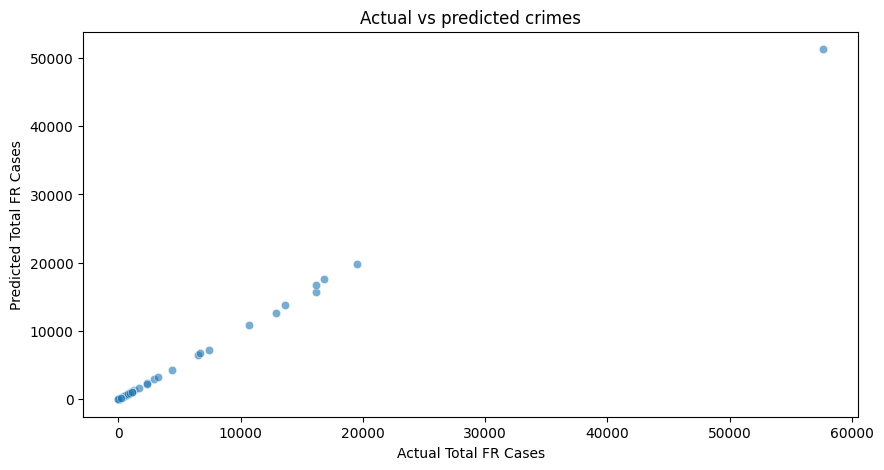

In [262]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Actual Total FR Cases")
plt.ylabel("Predicted Total FR Cases")
plt.title("Actual vs predicted crimes")
plt.show()

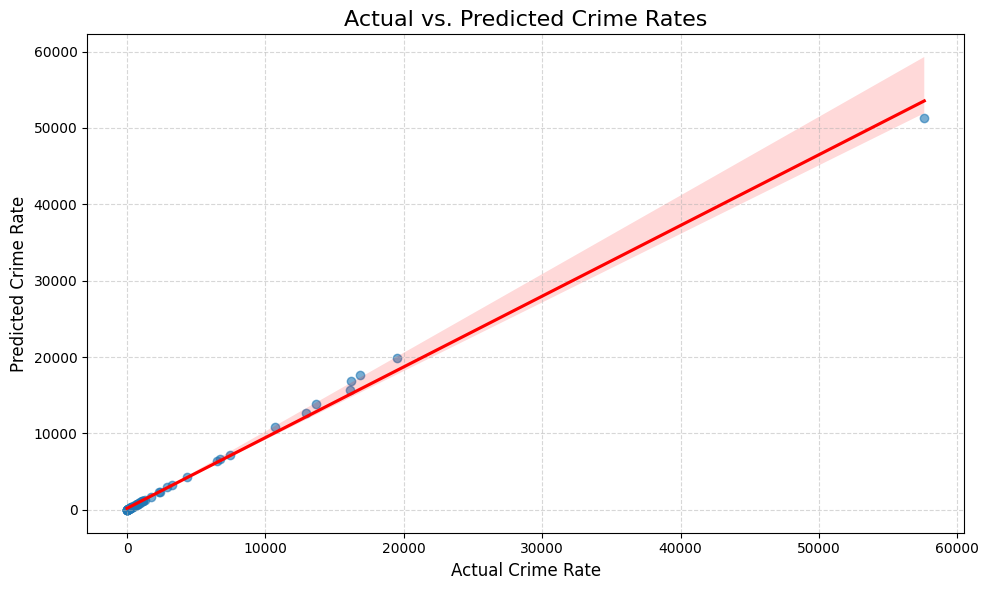

In [263]:
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.6}, line_kws={"color": "red"})
plt.title('Actual vs. Predicted Crime Rates', fontsize=16)
plt.xlabel('Actual Crime Rate', fontsize=12)
plt.ylabel('Predicted Crime Rate', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [264]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

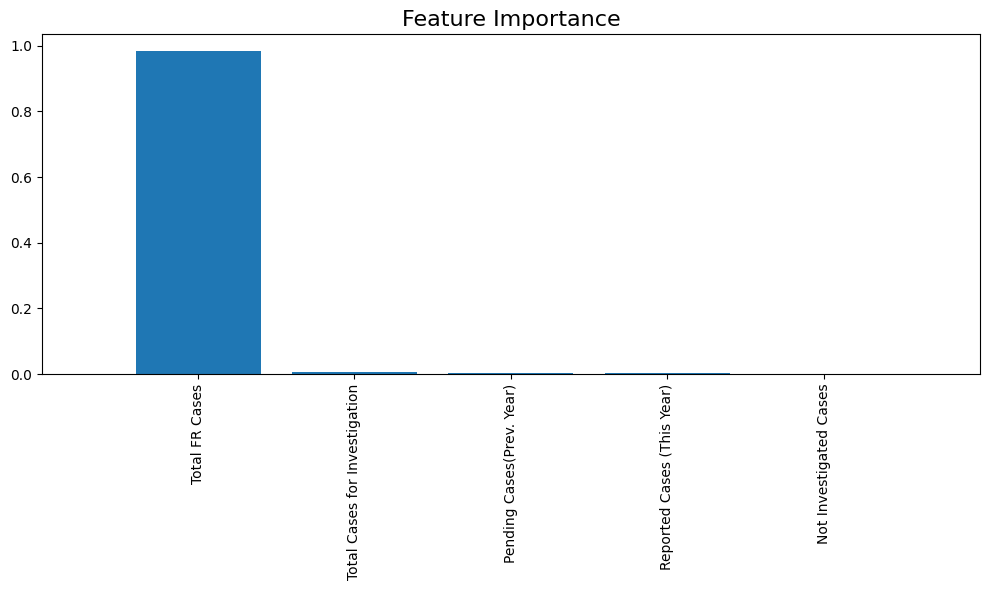

In [265]:
plt.figure(figsize=(10, 6))
plt.title("Feature Importance", fontsize=16)
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()

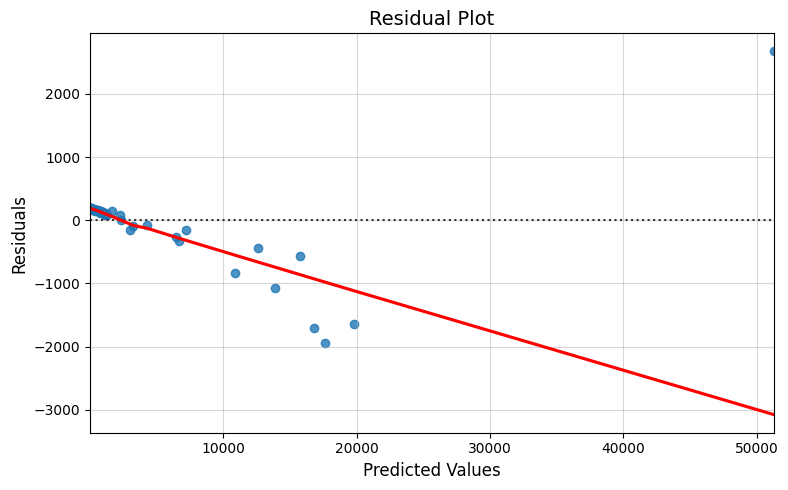

In [266]:
residuals = y_test - y_pred
plt.figure(figsize=(8,5))
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color':'red'})
plt.title('Residual Plot', fontsize=14)
plt.xlabel('Predicted Values', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()

In [267]:
joblib.dump(model, "crime_rate_prediction_model.pkl")

['crime_rate_prediction_model.pkl']